In [1]:
# Load dataset
import pandas as pd

data = pd.read_csv("C:\\Users\\sonja tilly.ABERDEEN\\mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
# encode labels

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [3]:
# split out features and target labels

y = data['class']
X = data.drop(['class'], axis=1)

In [5]:
# split out training and test set
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [6]:
# apply neural network model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), solver='adam',warm_start=False, random_state=None)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [7]:
y_pred = clf.predict(X_train)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
cm = (confusion_matrix(y_train,y_pred))




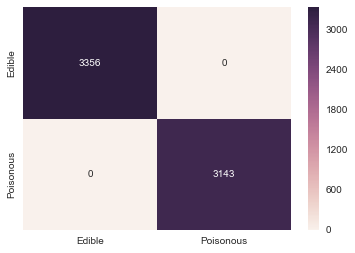

In [78]:
import seaborn as sns
%matplotlib inline

sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Edible", "Poisonous"],yticklabels=["Edible","Poisonous"])


In [79]:
print(classification_report(y_train,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3356
          1       1.00      1.00      1.00      3143

avg / total       1.00      1.00      1.00      6499



In [80]:
'''The downside however to using a Multi-Layer Preceptron model is how difficult it is to interpret the model itself. 
The weights and biases won't be easily interpretable in relation to which features are important to the model itself.

However, if you do want to extract the MLP weights and biases after training your model, you use its public attributes coefs_ and intercepts_.

coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.

intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.'''

len(clf.coefs_[0])

22

In [81]:
from sklearn.ensemble import RandomForestClassifier 

tree = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

In [82]:
import numpy as np

keyfeat = tree.feature_importances_
indices = np.argsort(keyfeat)[::-1]

In [120]:
# feature ranking

df = pd.DataFrame(keyfeat, indices)
print("Feature ranking:")


Feature ranking:


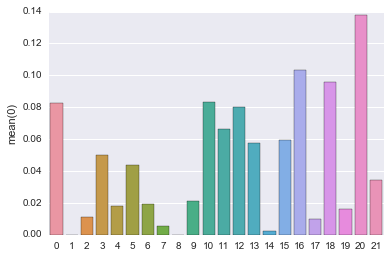

In [128]:
%matplotlib inline

ax = sns.barplot(x=df.index, y=df[0])
